In [24]:
import numpy as np
import pandas as pd
import h5py
import pysam
import os
from modisco.visualization import viz_sequence
from modisco import util
from matplotlib import pyplot as plt
import pybedtools
import pandas as pd
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [43]:
dttype = 'dnase'
mode = 'counts'

celltype="GM12878"
modisco_path = '/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/'+celltype+'/merge_folds_new/counts/modisco_old_format.h5'
ppm_dir = '/mnt/lab_data2/anusri/chrombpnet/results/tobias/ATAC_PE/'+celltype+'/'+celltype+'_ATAC_TOBIAS_NEW_COUNTS/'
#!mkdir ppm_dir
#tomtom = pd.read_csv("/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/ATAC_PE/K562/K562_02.17.2022_bias_128_4_1234_0.5_fold_0/SIGNAL/modisco/" + mode + ".tomtom.tsv", sep="\t")


from bs4 import BeautifulSoup
import pandas as pd

htmld="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/"+celltype+"/merge_folds_new/counts/motifs.html"
#table = BeautifulSoup(open(htmld,'r').read()).find('table')

tomtom = pd.read_html(htmld)


#background=[0.25, 0.25, 0.25, 0.25]

In [44]:
tomtom[0]

,pattern,num_seqlets,modisco_cwm_fwd,modisco_cwm_rev,match0,qval0,match0_logo,match1,qval1,match1_logo,match2,qval2,match2_logo
0,pos_patterns.pattern_0,33945,NaN,NaN,IRF1_MOUSE.H11MO.0.A,1.138220e-03,NaN,IRF1_HUMAN.H11MO.0.A,1.138220e-03,NaN,STAT2_HUMAN.H11MO.0.A,1.138220e-03,NaN
1,pos_patterns.pattern_1,31055,NaN,NaN,CTCF_MA0139.1,7.873460e-14,NaN,CTCF_HUMAN.H11MO.0.A,1.302790e-09,NaN,CTCF_MOUSE.H11MO.0.A,1.827970e-08,NaN
2,pos_patterns.pattern_2,20226,NaN,NaN,SPI1_HUMAN.H11MO.0.A,3.365930e-04,NaN,SPIB_MOUSE.H11MO.0.A,3.365930e-04,NaN,SPI1_MOUSE.H11MO.0.A,3.365930e-04,NaN
3,pos_patterns.pattern_3,17141,NaN,NaN,RUNX1_HUMAN.H11MO.0.A,3.627260e-02,NaN,RUNX3_HUMAN.H11MO.0.A,1.073110e-01,NaN,RUNX1_MOUSE.H11MO.0.A,1.073110e-01,NaN
4,pos_patterns.pattern_4,16150,NaN,NaN,JDP2_MA0655.1,3.099440e-03,NaN,JDP2_bZIP_3,3.099440e-03,NaN,FOS+JUND_MA1141.1,3.099440e-03,NaN
5,pos_patterns.pattern_5,12502,NaN,NaN,NFKB1_HUMAN.H11MO.1.B,6.058370e-05,NaN,NFKB1_MOUSE.H11MO.0.A,6.058370e-05,NaN,TF65_HUMAN.H11MO.0.A,6.058370e-05,NaN
6,pos_patterns.pattern_6,10067,NaN,NaN,IRF4_HUMAN.H11MO.0.A,2.708130e-07,NaN,IRF8_HUMAN.H11MO.0.B,2.359790e-06,NaN,IRF8_MOUSE.H11MO.0.A,2.359790e-06,NaN
7,pos_patterns.pattern_7,6890,NaN,NaN,Gabpa_MA0062.2,2.058070e-06,NaN,ELK4_MA0076.2,1.053440e-05,NaN,ELK4_HUMAN.H11MO.0.A,1.053440e-05,NaN
8,pos_patterns.pattern_8,6841,NaN,NaN,KLF12_HUMAN.H11MO.0.C,9.140990e-05,NaN,SP1_HUMAN.H11MO.0.A,9.140990e-05,NaN,SP3_HUMAN.H11MO.0.B,3.909220e-04,NaN
9,pos_patterns.pattern_9,3674,NaN,NaN,NFYB_HUMAN.H11MO.0.A,5.336540e-03,NaN,NFYB_MOUSE.H11MO.0.A,5.336540e-03,NaN,NFYA_HUMAN.H11MO.0.A,6.019980e-03,NaN


In [45]:
label_dict = {}

for index,row in tomtom[0].iterrows():
    label_dict[row['pattern']] = row['match0']
        

# Functions

In [46]:
def _plot_weights(array,
                  figsize=(10,3),
                 **kwargs):
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111) 
    viz_sequence.plot_weights_given_ax(ax=ax, array=array,**kwargs)
    plt.show()
    plt.close()

# Fetch PPMs

metacluster_0
pattern_0


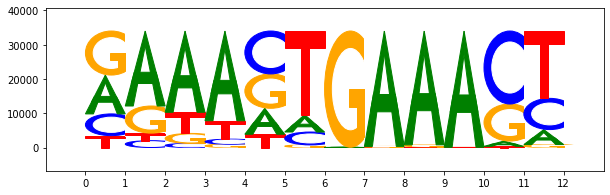

pattern_1


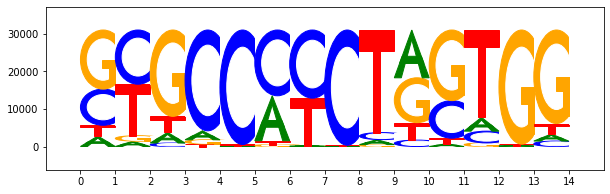

pattern_2


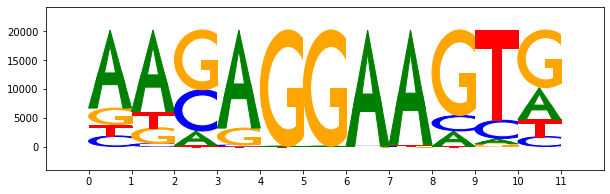

pattern_3


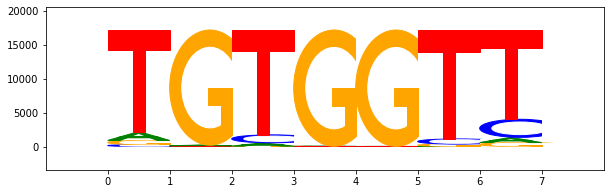

pattern_4


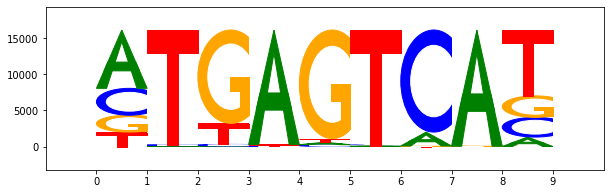

pattern_5


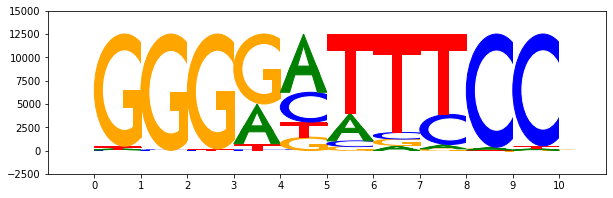

pattern_6


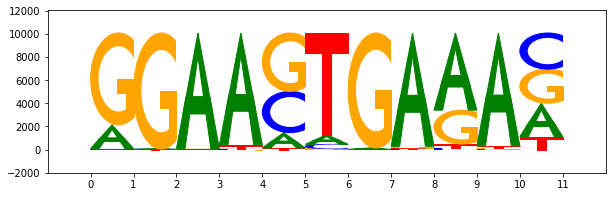

pattern_7


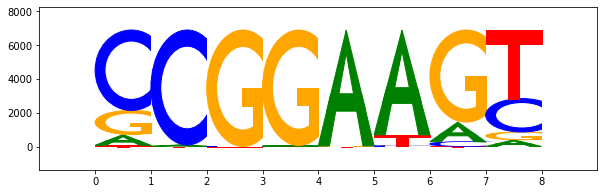

pattern_8


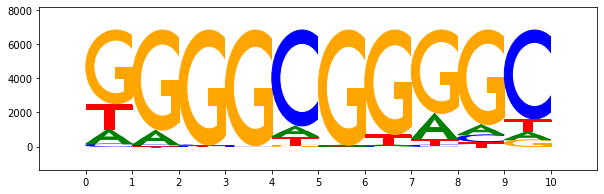

pattern_9


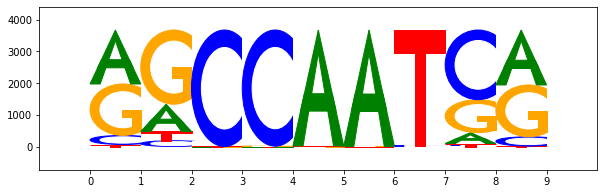

pattern_10


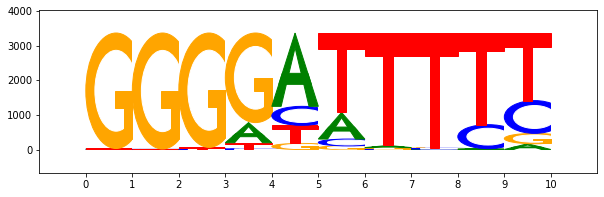

pattern_11


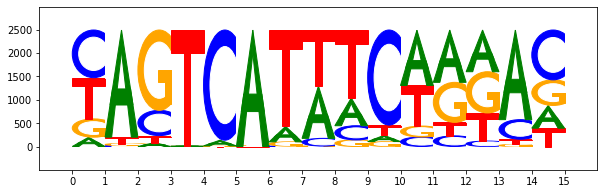

pattern_12


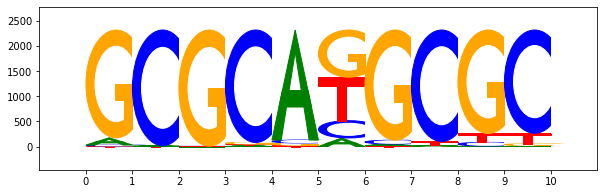

pattern_13


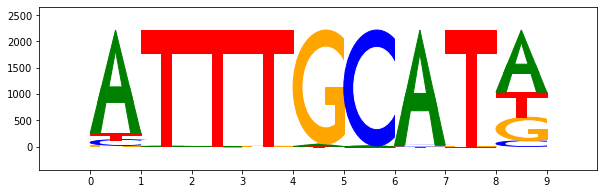

pattern_14


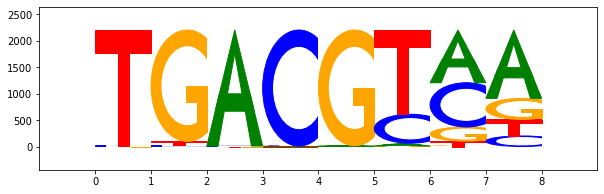

pattern_15


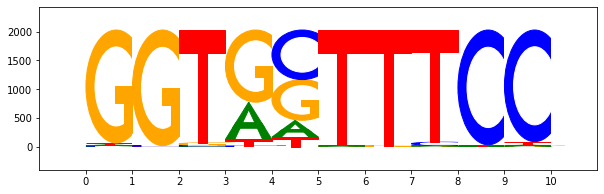

pattern_16


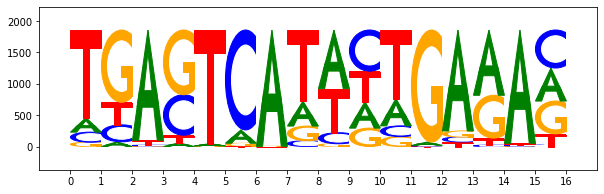

pattern_17


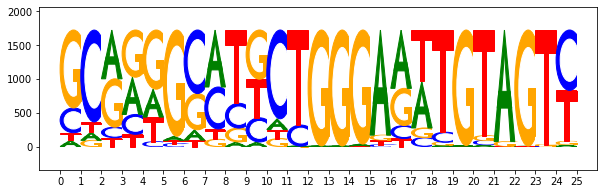

pattern_18


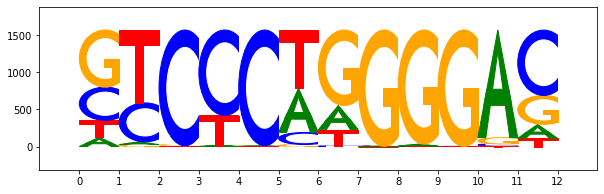

pattern_19


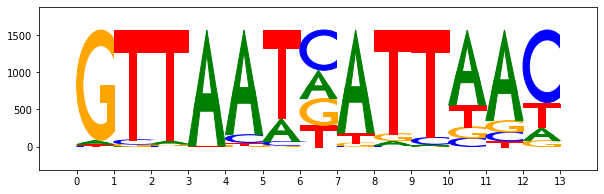

pattern_20


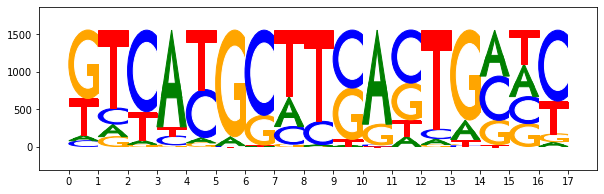

pattern_21


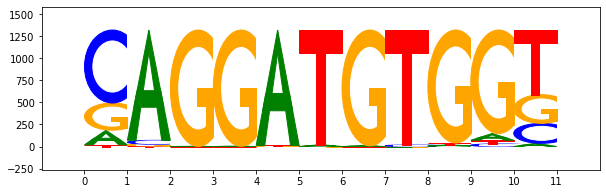

pattern_22


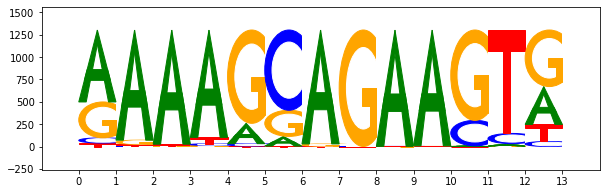

pattern_23


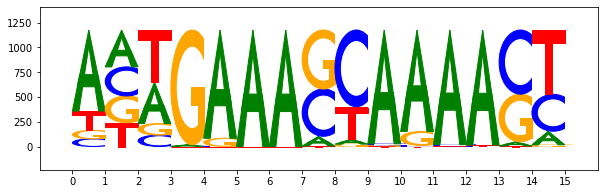

pattern_24


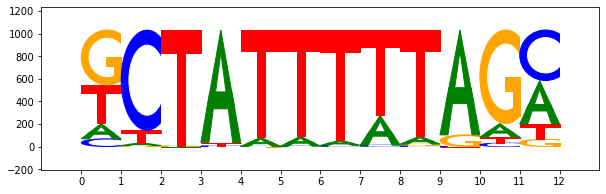

pattern_25


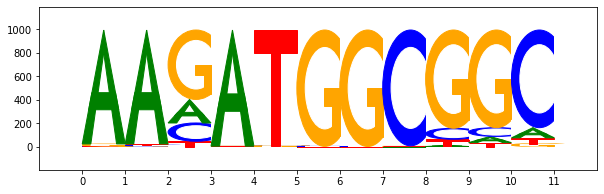

pattern_26


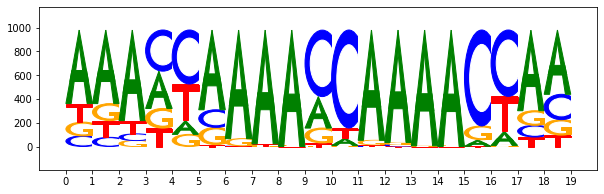

pattern_27


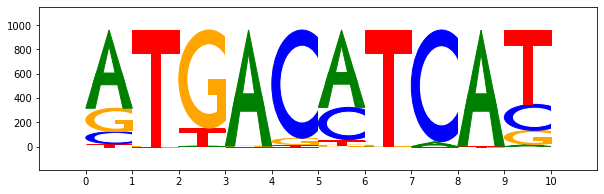

pattern_28


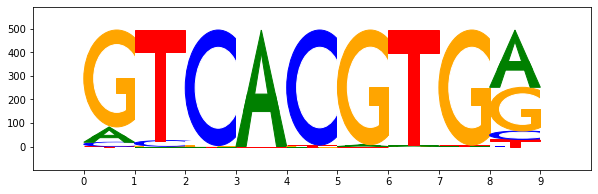

pattern_29


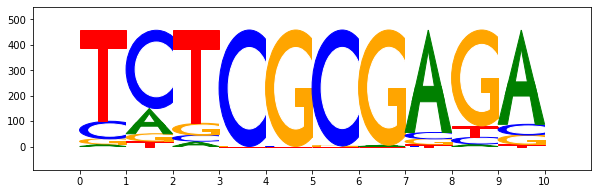

pattern_30


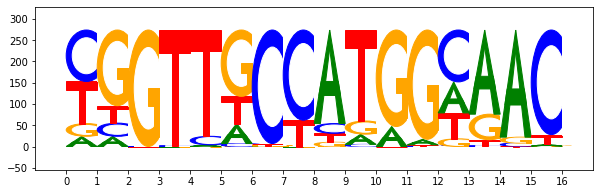

pattern_31


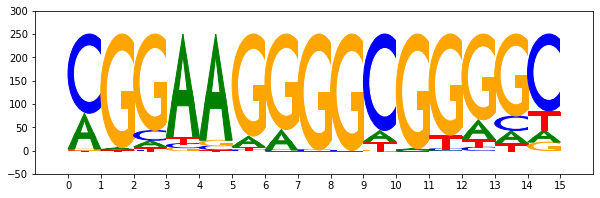

pattern_32


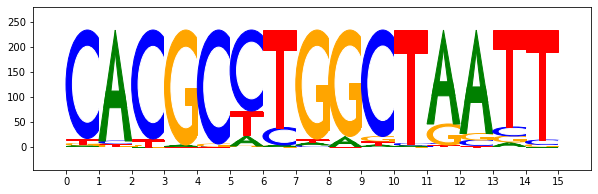

pattern_33


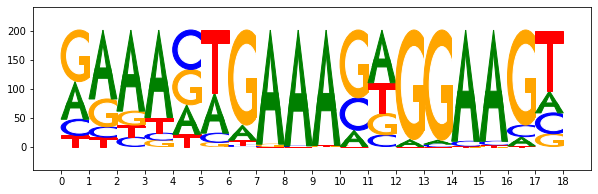

pattern_34


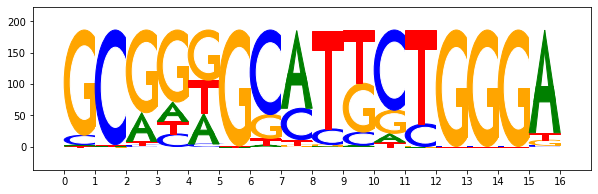

pattern_35


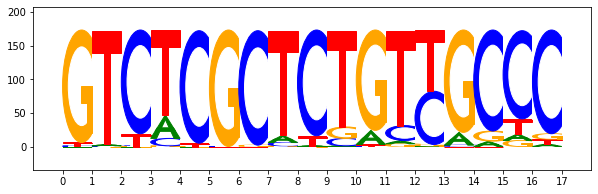

pattern_36


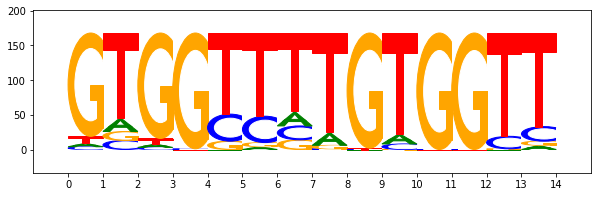

pattern_37


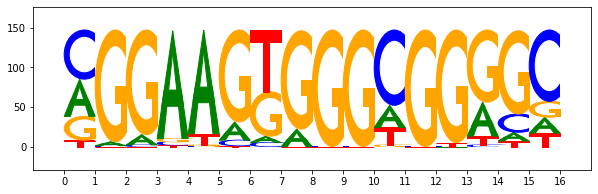

pattern_38


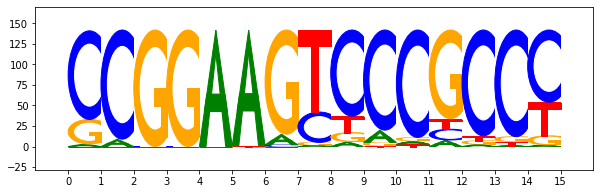

pattern_39


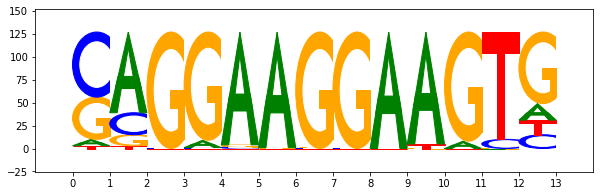

pattern_40


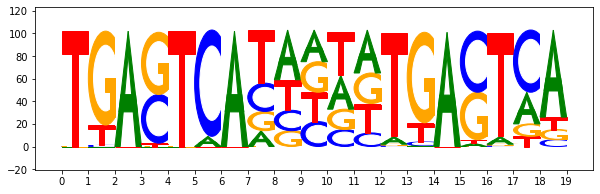

pattern_41


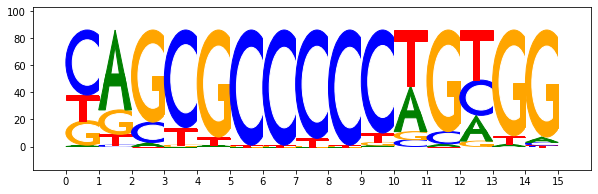

pattern_42


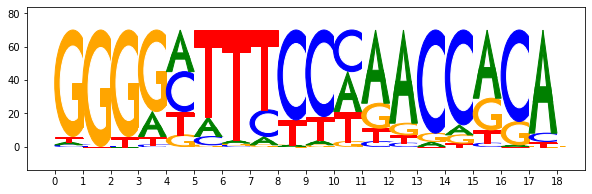

pattern_43


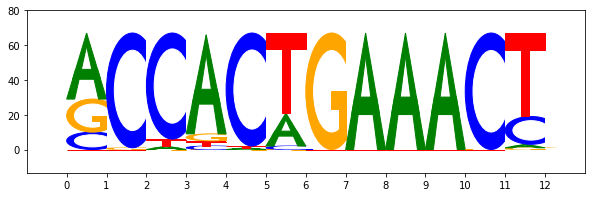

pattern_44


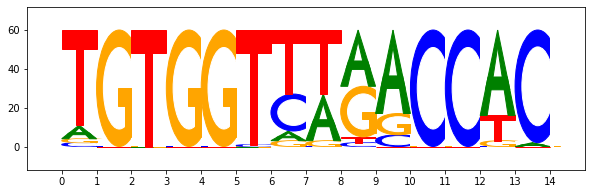

pattern_45


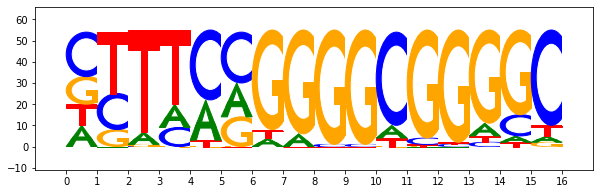

pattern_46


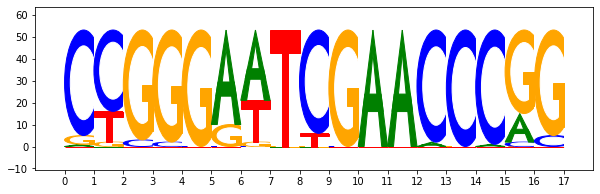

pattern_47


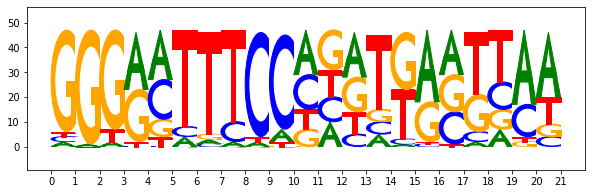

pattern_48


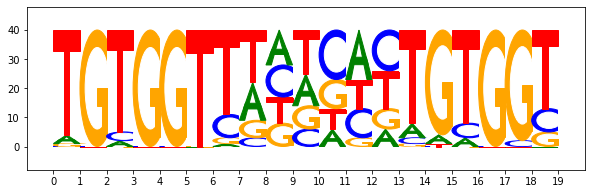

pattern_49


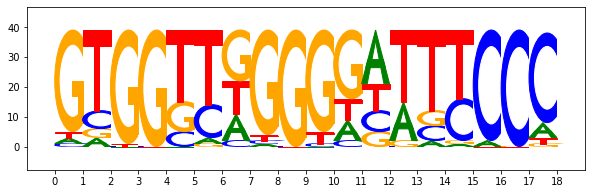

pattern_50


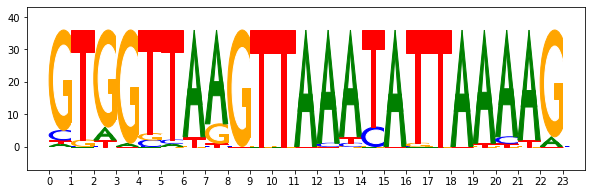

pattern_51


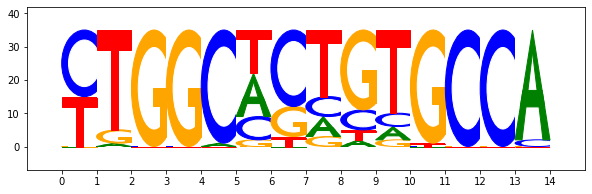

pattern_52


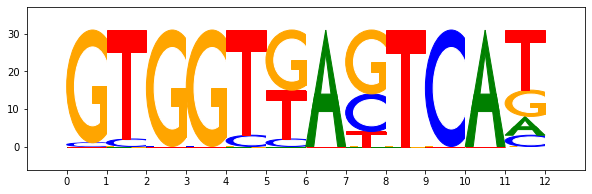

pattern_53


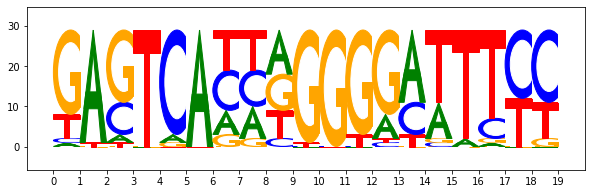

pattern_54


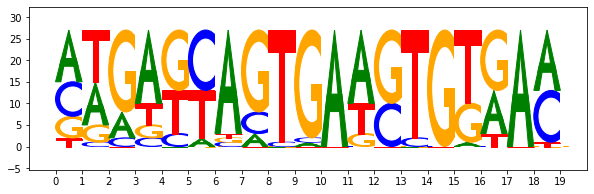

pattern_55


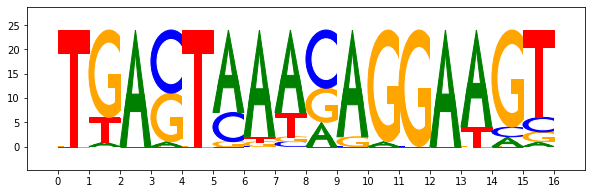

metacluster_1
pattern_0


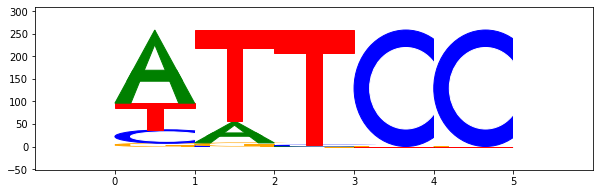

pattern_1


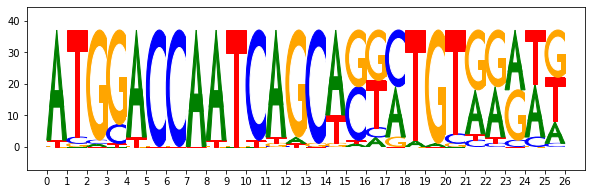

In [47]:
modisco_results = h5py.File(modisco_path, 'r')

for metacluster_name in modisco_results["metacluster_idx_to_submetacluster_results"]:
    print(metacluster_name)

    metacluster = modisco_results["metacluster_idx_to_submetacluster_results"][metacluster_name]
    all_pattern_names = [x for x in list(metacluster["seqlets_to_patterns_result"]["patterns"]["all_pattern_names"][:])]

    for pattern_name in all_pattern_names:
        print(pattern_name)

        ppm = np.array(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]['sequence']['fwd'])
        cwm = np.array(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]["task0_contrib_scores"]['fwd'])
        num_seqlets = len(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]['seqlets_and_alnmts']['seqlets'])

        score = np.sum(np.abs(cwm), axis=1)
        trim_thresh = np.max(score) * 0.25  # Cut off anything less than 30% of max score
        pass_inds = np.where(score >= trim_thresh)[0]
        trimmed = ppm[np.min(pass_inds): np.max(pass_inds) + 1]
        pfm = trimmed * num_seqlets
        pfm = pfm.astype(int)
                
        _plot_weights(pfm.transpose())
    
        #if trimmed.shape[0] < 22 and trimmed.shape[0] > 4:
        if metacluster_name=="metacluster_0":
            key_name = "pos_patterns."+str(pattern_name)
        else:
            key_name = "neg_patterns."+str(pattern_name)

        
        with open(ppm_dir + '/' +  mode +  '.ppms.txt', 'a') as outfile:
            outfile.write('>' + key_name + "." + label_dict[key_name] + '\n')

        with open(ppm_dir + '/' +  mode +  '.ppms.txt', 'ab') as outfile:
            np.savetxt(outfile, pfm.transpose(), fmt='%i')
        

